# Homework 2: Perceptron, Logistic Regression, Stocashtic Gradient Descent



This assignment is due on Moodle by **11:59pm on Friday Sep 25**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 30% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen


**Please put your name and cuidentity username.**

**Name**: Muntaha Pasha

**Identity Key**: mupa0444

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## [40 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 [5 points]
Complete the `perceptron_train` function and report the results.

**SOURCES USED:**

1 - (How a Perceptron Works in Python w/ Activation Value) https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

2 - (Understanding a different Perceptron Implementation) https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428

In [2]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [3]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias, number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        #Just seeing what variables X and y are storing.
        #print(X,y)
        #row = row + 1
        # YOUR CODE HERE
        #Holding value to start the perceptron
        start = 0
        weightLen = len(weights)
        #Go through weights array
        for i in range(weightLen):
            #Multiple weight [i] by X[i]
            WeightsArr = weights[i] * X[i]
            #Update value
            start = start + WeightsArr
        #Update value again with bias
        start = start + bias
        #The Perceptron Activation
        checkerVal = start*y
        if(checkerVal <= 0):
            #Update Mistakes
            mistakes_count = mistakes_count + 1
            WeightAdd = y * X
            #Update weights
            weights = weights + WeightAdd
            #Update Bias
            bias = bias + y
        #raise NotImplementedError()
    return weights, bias, mistakes_count

#### Part 1 A [2.5 points]
Report the weights, bias, and number of mistakes after the first epoch.

In [4]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 5


In [5]:
# for grading - ignore

#### Part 1 B [2.5 points]:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [6]:
epochs = 50
for i in range(epochs):
    # YOUR CODE HERE
    # raise NotImplementedError()
    weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 4


In [7]:
# for grading - ignore

### Part 2 [5 points] 
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

**SOURCES USED:**

1 - (Perceptron Algorithm) https://www.cs.utah.edu/~zhe/pdf/lec-10-perceptron-upload.pdf

**(SOLUTION):**

The Perceptron Classifier wouldn't be able to perfectly classify the training examples even after more passes because the classes themselves are not linearly separable. We have $1$, and $-1$ as our classes and if we look at data, we end up seeing in the 3D space that points are opppositely classified on separate corners and thus making it impossible to really split our data linearly. $\checkmark$

### Part 3 [5 points] 
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

**(SOLUTION):**

Not Necessarily. Say we do have a different order for our data, and we make a mistake. Well the mistakes we make will affect both our bias and weight, and in turn those affect how the data points after are assessed. So therefore, the order $\textbf{does}$ matter in this case. $\checkmark$

###  Part 4 [15 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

1 - (Numpy Random Permutations) https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html

In [8]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """

        # YOUR CODE HERE
        # raise NotImplementedError()
        #Traverse through Epochs
        for i in range(max_epochs):
            #Initialize mistake variable
            mistake = 0
            X_train_len = len(self.X_train)
            #We want a random permutation of data, we want to shuffle it before our training.
            randomPerm = np.random.permutation(X_train_len)
            #Add a permutation of random variables to an array of y's and X's
            y_new = self.y_train[randomPerm]
            X_new = self.X_train[randomPerm]
            #print(y_new)
            #print(X_new)
            #Now for tuple in X_new...
            for j, k in enumerate(X_new):
                #print(self.w)
                #print(j, k)
                #Now take the dot product of two arrays.
                dotVal = np.dot(k, self.w)
                #Add the dot product and the bias to our activation value
                v = dotVal + self.b
                #Check for mistakes
                if(v * y_new[j] <= 0):
                    #Update bias
                    self.b = self.b + y_new[j]
                    #Update weight
                    self.w = self.w + (y_new[j] * k)
                    #Update mistake value
                    mistake = mistake + 1
            #Now update mistakes with the mistake value
            self.num_mistakes = self.num_mistakes + mistake
            #If we have made 0 mistakes, then return and keep going.
            if(mistake == 0):
                return

    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            # YOUR CODE HERE
            # raise NotImplementedError()
            r = np.arange(-1, 1, 0.1)
            p1 = (-self.b / self.w[1])
            p2 = (self.w[0] / self.w[1])
            p = p2 * r
            r2 = p1 - p
            ax.plot(r, r2, "black")
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

#### Part 4 A [5 points]
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

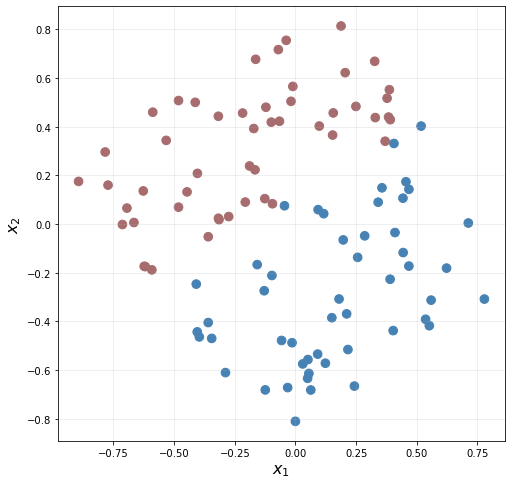

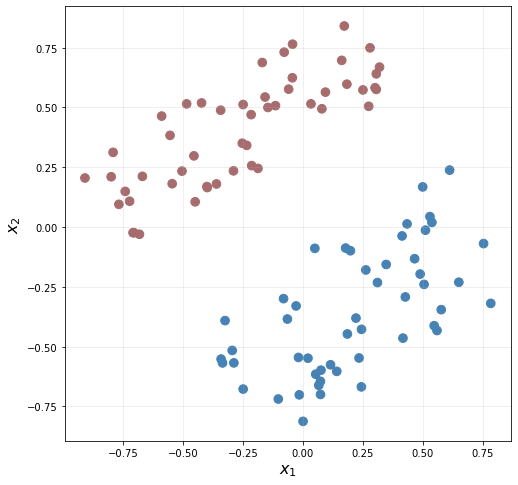

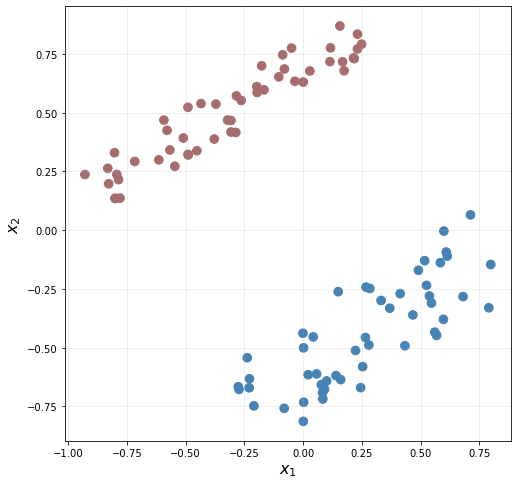

In [9]:
margin = 0.01 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

margin = 0.2 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

margin = 0.4 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

**(SOLUTION):**

After executing some different Margin Values, the conclusion I've reached is that what Margin is doing is actually changing how linearly separable two classes are. For example, let's look at the case of $0.01$. All the data points are extremely close to one another and its hard to distinguish where they'd be linearly spearable, as opposed to if you jump to a Margin value of $0.04$, you can immediately see how easy it is to separate the points. The $\textbf{smaller}$ the margin, the $\textbf{smaller}$ the distance between two classes and they may not be linearly separable, (though you could try running more Epochs and see if Perceptron can get you anywhere). The $\textbf{larger}$ the margin, the $\textbf{bigger}$ the distance between two classes and the easier it is to linearly separate them. $\checkmark$

#### Part 4 B [5 points] 
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch.
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process.


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [10]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


#### Part 4 C [5 points]
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


YOUR ANSWER HERE

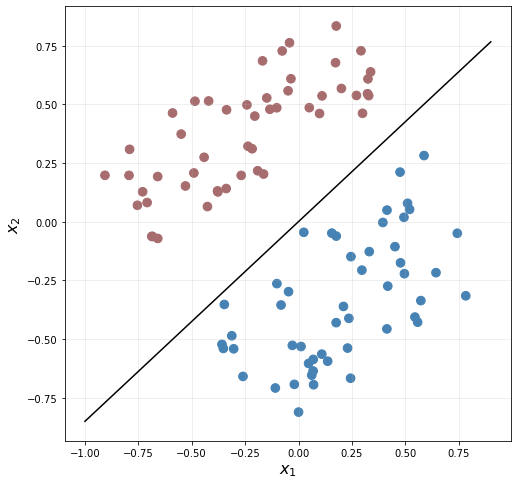

In [11]:
perc = Perceptron(n=100, margin=0.15)
perc.train(max_epochs = 100)
perc.plot_model(decision_boundary=True)

### Part 5 [10 points]

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

**SOURCES USED:**

1 - (Plotting in Python) https://matplotlib.org/tutorials/introductory/pyplot.html

Text(0, 0.5, 'Avg # of Mistakes')

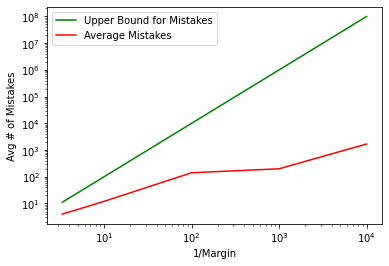

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()
Margins = [0.3, 0.1, 0.01, 0.001, 0.0001]
#Initialize two lists
Frac_Marg = [] #For 1/M
Frac_Marg2 = [] #For M^2 Upper Bound
Mistakes = [] #For Average Mistakes
mistake = []
#First append the inverses of Margins
for i in Margins:
    Frac_Marg.append(1/i)
#Now append Upper Bound Values (M^2)
for i in Frac_Marg:
    Frac_Marg2.append(i**2)
#Create a list for Avg Mistakes Made
for i in range(len(Margins)):
    Mistakes.append(0)
#Now within margins..
for j, k in enumerate(Margins):
    #Create a Mistake Array
    for i in range(len(Margins)):
        mistake.append(0)
    #Now through margins list...
    for l in range(len(Margins)):
        #Find and perform Perceptron
        perceptr = Perceptron(n = 100, margin = k)
        perceptr.train(max_epochs = 1000000)
        mistake[l] = perceptr.num_mistakes
    #Update avg Mistakes
    Mistakes[j] = sum(mistake)/len(Margins)
    
plt.loglog(Frac_Marg, Frac_Marg2, color = 'green', label = 'Upper Bound for Mistakes')
plt.loglog(Frac_Marg, Mistakes, color = 'red', label = 'Average Mistakes')
plt.legend()
plt.xlabel("1/Margin")
plt.ylabel("Avg # of Mistakes")

#### Extra Credit [5 points]

* Explain the limitations of the vanilla perceptron implemented above.
* Provide pseudo code/steps to implement Voting Perceptron or Average Perceptron (see the textbook) and discuss the pros and cons (Compare space complexity)

**SOURCES USED:**

1 - (A Course in Machine Learning, ML Textbook) http://ciml.info/

**(SOLUTION):**

* Explain the limitations of the vanilla perceptron implemented above

While the Vanilla Perceptron Algorithm does tend to work well most of the times, it certainly does have its limitations. One such limitation as was mentioned in our Machine Learning Textbook.
$\textbf{A Course in Machine Learning}, \text{Hal Daumé III}$, cites that the Vanilla Perceptron "counts later points more than it counts earlier points". Meaning, if our Perceptron was classifying over a thousand or so data points, and did a really good job at classifying a majority of those points, but then right at the end it decided to throw an error, then we've basically wasted a perfectly good weight vector (which then leads us into how to prolong the life of a weight vector via Voting). To conclude, the main issue is that the classifications we do later can sometimes heavily override all the progress we make in the beginning! $\checkmark$.

* Average Percepton Algorithm Pseudocode, Pros/Cons, Complexity

To implement the Average Perceptron PseudoCode, we can follow along with the basic steps given to us in the textbook.

$\hspace{19mm} \text{Input: A Training Set (D) with labels, containing tuples of (x, y) pairings.}$
$\hspace{19mm} \text{Initialize: HyperParamater, (E), Number of Epochs}$
$\hspace{19mm} \text{Initialize: Weights Vector (w) and Bias}$
$\hspace{19mm} \text{Initialize: Cached Weights Vector (u) and Bias}$
$\hspace{19mm} \text{Initialize: Example Counter(c) to 1.}$

$\hspace{19mm} \text{for i = 1 ... E do:}$

$\hspace{25mm} \text{for all tuples (x, y) in D do:}$

$\hspace{31mm} \text{if y(w}\cdot \text{ x + b)} \leq 0, \text{then:}$

$\hspace{37mm} \text{w = w + y x} \text{     //Weights Update}$

$\hspace{37mm} \text{b = b + y} \text{     //Bias Update}$

$\hspace{37mm} \text{u = u + y c x} \text{     //Catched Weights Update}$

$\hspace{37mm} \beta = \beta \text{ + y c} \text{     //Cached Bias Updates}$

$\hspace{31mm} \text{end if:}$

$\hspace{31mm} \text{c = c + 1} \text{     //Counter Incrementing w/ or w/o update}$

$\hspace{25mm} \text{end for}$

$\hspace{19mm} \text{end for}$

$\hspace{19mm} \text{return w -} \frac{1}{c} \text{u, b -} \frac{1}{c} \beta$

So at the end, we are returning an averaged weight and bias.

The Pros of Averaged Perceptron are that we can maintain a currently running sum of an averaged weight vector along with an averaged bias. Our prediction for the Test-Time is as efficient as Vanilla Perceptron. It does generalize better to test the data, but the cons of Averaged Perceptron are that eventually though, it will start to overfit on the data so you would need to stop it before it does so. According to the figure in the Textbook, it shows how Averaged Perceptron generalizes better than perceptron on the training and test data, however we run the risk of overfitting. $\checkmark$

## [60 points] Problem 2 : Logistic Regression + SGD

In this Problem, you'll implement a Logistic Regression classifier to predict whether person on the Titanic will survive or not.


Dataset has following attributes:

|Variable|Definition|Key|
|:----:|:----:|:---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Age |Age in years	||
|fare	|Passenger fare|	|
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	||
|sex	| Sex|	one hot encoded male, female|
|embarked | Port of Embarkation | one hot encoded C = Cherbourg, Q = Queenstown, S = Southampton|



Following is a class to load the titanic dataset.

In [13]:
# Make sure you have installed pandas and numpy before you run.
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from collections import defaultdict

class Dataset:
    """
    Class to load dataset containing titanic survival features
    """

    def __init__(self, location, random_state=1241):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        np.random.seed(random_state)
        f = gzip.open(location, 'rb')
        self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)
        # appending biases
        self.train_x = np.concatenate((np.ones((self.train_x.shape[0], 1)), self.train_x), axis=1)
        self.test_x = np.concatenate((np.ones((self.test_x.shape[0], 1)), self.test_x), axis=1)
        f.close()
        
    @staticmethod
    def shuffle(X, y):
        """ Shuffle training data """
        shuffled_indices = np.random.permutation(len(y))
        return X[shuffled_indices], y[shuffled_indices]

### Part 1 [5 points]: Implementing sigmoid

#### Part 1 A [4 points] 
First, implement the `sigmoid` function to return the output by applying the sigmoid function $\sigma(z)$ to the input parameter, where the sigmoid function $\sigma(z)$ is defined as:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

**SOURCES USED:**

1 - (Help w/ Sigmoid in Python) https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/

In [14]:
def sigmoid(score, threshold=20.0):
    """
    Sigmoid function with a threshold
    :param score: A real valued number to convert into a number between 0 and 1
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    avScore = abs(score)
    #Check if the score bigger than the threshold
    if(avScore > threshold):
        #Update the score
        score = np.sign(score) * threshold
    #Now solve for sigma(z)
    denom = 1 + exp(-score)
    #Store value
    sigmoidRes = 1 / denom
    return sigmoidRes

In [15]:
# verify sigmoid implemention w/ scipy;
# note: you should NOT use scipy for your implementation!
from scipy.stats import logistic
assert sigmoid(1) == logistic.cdf(1)
assert sigmoid(5) == logistic.cdf(5)
assert sigmoid(100, threshold=20) == logistic.cdf(20)
assert sigmoid(-1) == logistic.cdf(-1)
assert sigmoid(-5) == logistic.cdf(-5)
assert sigmoid(-100, threshold=20) == logistic.cdf(-20)

#### Part 1 B [1 point]

Next, implement the derivative of the `sigmoid` function, `sigmoid_grad`, i.e. $\frac{\partial\sigma(x)}{\partial x}$.

Hint: your implementation of `sigmoid_grad` should be able to use  your `sigmoid` function to compute the derivative!

**SOURCES USED:**

1 - (Understanding Sigmoid/Derivative of Sigmoid in Python) https://pylessons.com/Logistic-Regression-part1/

In [16]:
def sigmoid_grad(y, threshold=20.0):
    """
    Derivative/gradient of the sigmoid function.
    :param y: A real valued input for which to compute the derivative.
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid derivative function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    sigmoidFunc = sigmoid(y)
    d_s = sigmoidFunc * (1 - sigmoidFunc)
    return d_s

In [17]:
# verify sigmoid_grad using numerical differentiation, i.e: f(x+h)-f(x-h) / 2h
epsilon = 1.0E-8
assert np.isclose(sigmoid_grad(1.0), (sigmoid(1.0 + epsilon) - sigmoid(1.0 - epsilon)) / (2.0*epsilon))
assert np.isclose(sigmoid_grad(0.1), (sigmoid(0.1 + epsilon) - sigmoid(0.1 - epsilon)) / (2.0*epsilon))

### Part 2 [35 points]

#### Part 2 A [15 points]

The negative log likelihood objective is defined as:
$$
\textrm{NLL}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] 
$$

First, write down the derivative of the negative log likelihood objective function, with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for  $n=1$.

**SOURCES USED:**

1 - (Gradient Descent Estimation) https://www.cse.iitk.ac.in/users/piyush/courses/pml_winter16/slides_lec5.pdf

**(SOLUTION):**

Since we are deriving for $n = 1$, we can change the formula above to incorporate that.
$$
\textrm{NLL}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^1 \left[y_1 \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(1)}) + (1-y_1)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(1)}))\right] 
$$

We can reduce the summation, that will go away because a sum from $1$ to $1$ is just the term itself so the sum will be gone, and we will be left with something like

$$y_i \cdot log \sigma(\beta^Tx_1) + (1 - y_1) \cdot log(1 - \sigma(B^Tx^{(1)})$$

Then you can further simplify the logarithm term because the derivative of $log(x)$ is $\frac{1}{x}$ so...

$$\frac {d(NLL)}{d\beta} = y_1 \cdot \frac{1}{\sigma(\beta^Tx^1)} + (1 - y_1) \cdot \frac{1}{1 - \sigma(B^Tx^1)}$$

Now we can multiply common denominators.

$$
\frac {d(NLL)}{d\beta} = \left(\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})-y_1\right){x^1}
$$

Next, using the `sigmoid` function implemented earlier, finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly without regularization.

**SOURCES USED:**

1 - (Numpy Dot Product) https://www.tutorialspoint.com/numpy/numpy_dot.htm

In [18]:
import math
class LogReg:
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: learning rate
        """
        self.w = np.zeros(num_features)
        self.eta = eta

    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, compute the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """

        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += math.log(p)
            else:
                logprob += math.log(1.0 - p)

            # Get accuracy
            if abs(y - p) <= 0.5:
                num_right += 1

        return logprob, float(num_right) / float(len(examples_y))

    def sgd_update(self, x_i, y, lam = 0.0):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :param lam : regularization term
        :return: Return the new value of the regression coefficients
        """
        # TODO: Finish this function to do a single stochastic gradient descent update
        # YOUR CODE HERE
        # raise NotImplementedError()
        #Use dot product
        param1 = self.w.dot(x_i)
        #Take the sigmoid function on the dot product
        pVal = sigmoid(param1)
        #These are the inner workings of the equation that I separated out.
        yminp = y - pVal
        p0 = (-x_i[0] * yminp)
        eq0 = self.eta * p0
        p1 = (x_i[1:] * yminp)
        eq1 = self.w[1:] * lam * 2 - p1
        eq2 = self.eta * eq1
        #Put together the parts for w[0]
        self.w[0] = self.w[0] - eq0
        #Put together the parts for w[1]
        self.w[1:] = self.w[1:] - eq2    

In [19]:
from tests import tests
tests.run_test_suite('prob 2A', LogReg)

testPosUnregUpdate (tests.tests.TestLogReg)
test update based on positive example ... ok
testNegUnregUpdate (tests.tests.TestLogReg)
test update based on negative example ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


#### Part 2 B [15 points]
Complete the code below to loop over the training data and perform stochastic gradient descent for a pre-defined number of epochs. You do not need to use the parameters lam and decay for this part.

Note: remember to shuffle your training data using `Dataset.shuffle` at the beginning of each epoch.

**SOURCES USED:**

1 - (More on Dataset Shuffling in different ways) https://www.w3schools.com/python/ref_random_shuffle.asp

2 - (Zip Function) https://www.w3schools.com/python/ref_func_zip.asp

3 - (More on Zip) https://www.programiz.com/python-programming/methods/built-in/zip

In [20]:
def train(epochs, eta, store_epoch, lam=0, decay=0):
    """
    Train a LogReg object for a set number of epochs with a given eta.
    
    Return three lists
    Two lists keep track of training and test accuracy after every store_epoch epochs
    
    The third list keeps track of learning rate after every store_epoch epochs. All values in this list 
    will be the same if decay = 0 (Only required for Part 2F)
    
    With store_epoch = 100, you would store accuracies after epochs = 100, 200....
    
    :param epochs: total number of training epochs
    :param eta: learning rate
    :param store_epoch: store training and test accuracies every print_epoch epochs
    :param lam: weight given to regularization term. 
    :param decay: Used to update learning rate during training (Part 3). 
                  Equals 0 when learning rate is constant throughout training (Part 2). 
    """
    
    dataset_handler = Dataset('./data/titanic.pklz')
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    assert dataset_handler.train_x.shape == (796,11)
    assert dataset_handler.test_x.shape == (200,11)
    
    train_accuracy_array = []
    test_accuracy_array = []
    learning_rates = []
    for epoch in range(epochs):
        # TODO: Finish the code to loop over the training data and perform a stochastic
        # gradient descent update on each training example.
        # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
        # to make sure the algorithm is truly learning properly on both training and test data
    # YOUR CODE HERE
    # raise NotImplementedError()
        #First, let's get our X and Y Test Data from shuffle function on test x and test y
        XTest, YTest=(dataset_handler.test_x, dataset_handler.test_y)
        #Now, let's get our X and Y Training Data from shuffle function on training x and training y
        XTrain, YTrain = dataset_handler.shuffle(dataset_handler.train_x, dataset_handler.train_y)
        #We need to zip our training data and update using sgd_update with values from X and Y Training
        for i, j in zip(XTrain, YTrain):
            #Use sgd update to complete the task
            lr.sgd_update(i, j)
        #Now, we know progress function returns a log probability, and a accuracy, so we can use this functions now.
        lp_test, testAcc =lr.progress(XTest, YTest)
        #We do the same thing for our training data now, we run progress and get back two return values.
        lp_train, trainAcc = lr.progress(XTrain, YTrain)
        #The next step is to take our test accuracies, and append it to the test array above.
        test_accuracy_array.append(testAcc)
        #Similarly, we append the array of training accuracy to the array given above.
        train_accuracy_array.append(trainAcc)
    return train_accuracy_array, test_accuracy_array, learning_rates

In [21]:
eta  = 1e-3
epochs = 500
store_epoch = 100

train_acc, test_acc, _ = train(epochs, eta, store_epoch)

for i in range(len(train_acc)):
    print("train accuracy after {} epochs: {}".format((i+1)*store_epoch, train_acc[i]))
    print("test accuracy after {} epochs: {}".format((i+1)*store_epoch, test_acc[i]))
    

train accuracy after 100 epochs: 0.5
test accuracy after 100 epochs: 0.52
train accuracy after 200 epochs: 0.5037688442211056
test accuracy after 200 epochs: 0.485
train accuracy after 300 epochs: 0.7010050251256281
test accuracy after 300 epochs: 0.7
train accuracy after 400 epochs: 0.5263819095477387
test accuracy after 400 epochs: 0.565
train accuracy after 500 epochs: 0.5037688442211056
test accuracy after 500 epochs: 0.485
train accuracy after 600 epochs: 0.5477386934673367
test accuracy after 600 epochs: 0.565
train accuracy after 700 epochs: 0.7386934673366834
test accuracy after 700 epochs: 0.715
train accuracy after 800 epochs: 0.5037688442211056
test accuracy after 800 epochs: 0.485
train accuracy after 900 epochs: 0.6809045226130653
test accuracy after 900 epochs: 0.72
train accuracy after 1000 epochs: 0.6884422110552764
test accuracy after 1000 epochs: 0.71
train accuracy after 1100 epochs: 0.5037688442211056
test accuracy after 1100 epochs: 0.485
train accuracy after 1200 

#### Part 2 C [5 points]
What is the role of the learning rate? What are the pros and cons of high/low learning rates? Do you see any trade-off? First, plot accuracies of different $\eta$s together vs. number of epochs for both training and testing. Then briefly elaborate on these questions.

**SOURCES USED:**

1 - (A closer look at Training/Testing Data in Python) https://data-flair.training/blogs/train-test-set-in-python-ml/

In [22]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}

epochs = 1500
store_epoch = 50
for eta in [1e-3, 1e-4, 1e-5, 1e-6]:
    # TODO: 
    # Finish the code to loop over different values of learning rates (Use the train() function above)
    # You need to store accuracy arrays obtained in the dictionaries provided 
    # above (train_results and test_results)
    # Effectively, you will be creating a mapping between eta -> train/test_accuracy_array 
    # Therefore, running train_results[eta] should return the train_accuracy_array for that value
    # of eta and likewise for test_results[eta].
    # YOUR CODE HERE
    # raise NotImplementedError()
    #I'm taking some of the code from Part 2 B
    #----------------- Part 2B ------------------
    #Initializations
    test_arr = []
    train_arr = []
    train = {}
    test = {}
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    
    #Now look through epochs
    for e in range(epochs):
        #First, let's get our X and Y Test Data from shuffle function on test x and test y
        XTest, YTest=(dataset_handler.test_x, dataset_handler.test_y)
        #Now, let's get our X and Y Training Data from shuffle function on training x and training y
        XTrain, YTrain = dataset_handler.shuffle(dataset_handler.train_x, dataset_handler.train_y)
        #We need to zip our training data and update using sgd_update with values from X and Y Training
        for i, j in zip(XTrain, YTrain):
            #Use sgd update to complete the task
            lr.sgd_update(i, j)
        #Now, we know progress function returns a log probability, and a accuracy, so we can use this functions now.
        lp_test, testAcc =lr.progress(XTest, YTest)
        #We do the same thing for our training data now, we run progress and get back two return values.
        lp_train, trainAcc = lr.progress(XTrain, YTrain)
        #Every 50th update we would do this.
        if(e % store_epoch == 0):
            #The next step is to take our test accuracies, and append it to the test array above.
            test_arr.append(testAcc)
            #Similarly, we append the array of training accuracy to the array given above.
            train_arr.append(trainAcc)
    #Now we want to append our testing and training value from outside the loop now into the array.
    test_arr.append(testAcc)
    #Append training values
    train_arr.append(trainAcc)
    #Finally, at the eta value, we store our test array and training array into the results
    test_results[eta] = test_arr
    #print(test_results[eta])
    train_results[eta] = train_arr
    #print(train_results[eta])

Plot training results below.

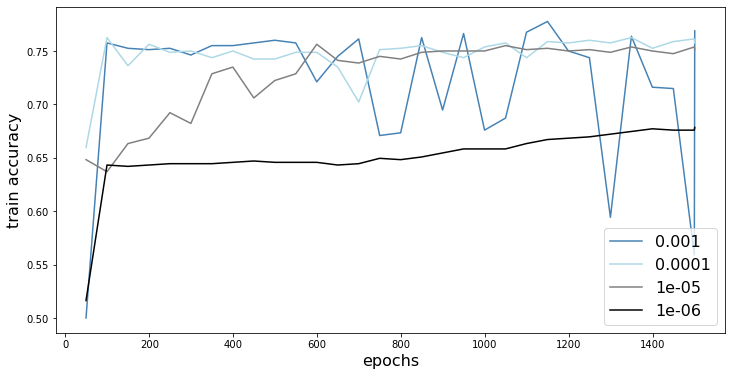

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#---Important!---
#I'm starting my range from 49, because without it, from range 50 to 1000 to 50 was giving me an error
#about dimensionality. So I'm starting 1 below 50. store_epoch has value 50, go to 1000, and use a step of 50 from my understanding
epochs_array = [i for i in range(store_epoch-1, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, train_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, train_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, train_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

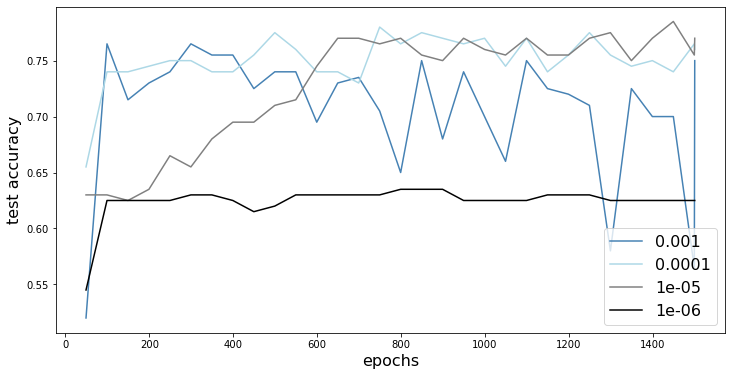

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#---Important!---
#I'm starting my range from 49, because without it, from range 50 to 1000 to 50 was giving me an error
#about dimensionality. So I'm starting 1 below 50. store_epoch has value 50, go to 1000, and use a step of 50 from my understanding
epochs_array = [i for i in range(store_epoch-1, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, test_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, test_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, test_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

**(SOLUTION):**

* What is the role of the learning rate? 

The Learning Rate is our $\textbf{Hyperparamater}$ which controls the rate at which a Model learns from the data. So for instance the learning rate, or $\text{step size}$ as it is referred to sometimes could be how much times we update our weight vector during the training process. $\checkmark$

* What are the pros and cons of high/low learning rates? Do you see any trade-off?

A $\textbf{learning rate that's low}$, or small, can sometimes halt or delay the model, and also having a smaller learning rate means running it more times (or having a bigger epoch) because changes made in the weights between updates would be miniscule. Meanwhile, a $\textbf{big learning rate}$ might make our model converge to some value way too fast, and that value could end up not even being your optimal solution that you would want. As well as that, because of the fast change that accompanies a larger learning rate, you have to run it few times because it'll be changing so drastically, so lesser epochs. $\checkmark$

#### Part 2 D [10 points]

Adding $l_2$ regularization to the feature parameters for NLL loss gives:

$$
\textrm{NLL}_{l_2}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$

where $p$ is the number of features, and $\beta_0$ is the bias term. Notice that $\beta_0$ is not included in the regularization term.

Write down the derivative of the regularized negative log likelihood loss function $\textrm{NLL}_{l_2}$ with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for $n=1$.

**(SOLUTION):**

Since we are deriving for $n = 1$, we can change the formula above to incorporate that.
$$
\textrm{NLL_I_2}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^1 \left[y_1 \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(1)}) + (1-y_1)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(1)}))\right] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$

We can reduce the summation, that will go away because a sum from $1$ to $1$ is just the term itself so the sum will be gone, and we will be left with something like

$$- [y_i \cdot log \sigma(\beta^Tx_1) + (1 - y_1) \cdot log(1 - \sigma(B^Tx^{(1)})] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2$$

Then you can further simplify...

The summation by $\lambda$ goes away, we take the derivative with respect to $\beta$ so, $\beta_k^2$ becomes just $2 \beta_k$, and we keep the first part the same from the derivative we took above so we get...

$$
\frac {d(NLL)}{d\beta_k} \text{ from }1 \text{ to } p = \left(\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})-y_1\right){x^1} + \lambda \cdot 2 \beta_k
$$

Update your implementation of the `sgd_update` method so that it performs regularized SGD updates of the model parameters to minimize the regularized NLL loss function.

Remember, do **not** regularize the bias parameter $\beta_0$.

Provide train and test accuracy after above change with `lam=1e-5`.

In [25]:
from tests import tests
tests.run_test_suite('prob 2E', LogReg)

testNegRegUpdate (tests.tests.TestLogReg)
test update based on negative example ... ok
testPosRegUpdate (tests.tests.TestLogReg)
test regularized update based on positive example ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


#### Part 2 E [5 points]
Update your implementation of train() to incorporate a regularization term. The change should typically be on only one line in your code.

Plot accuracies of different $\lambda$s together vs. epochs for both training and testing).

In [26]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}
epochs = 1500
eta = 1e-5
store_epoch = 50
for lam in [0, 0.01, 0.1, 0.05]:
    # TODO: 
    # Finish the code to loop over different values of lambda (Use the train() function above)
    
    # You need to store accuracy arrays obtained in the dictionaries provided 
    # above (train_results and test_results)
    
    # Effectively, you will be creating a mapping between lambda -> train/test_accuracy_array 
    # Therefore, running train_results[lam] should return the train_accuracy_array for that value
    # of lam and likewise for test_results[lam].
    
    # YOUR CODE HERE
    # raise NotImplementedError()
        # raise NotImplementedError()
    #I'm taking some of the code from Part 2 B
    #----------------- Part 2B ------------------
    #Initializations
    test_arr = []
    train_arr = []
    train = {}
    test = {}
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    #Now look through epochs
    for e in range(epochs):
        #First, let's get our X and Y Test Data from shuffle function on test x and test y
        XTest, YTest=(dataset_handler.test_x, dataset_handler.test_y)
        #Now, let's get our X and Y Training Data from shuffle function on training x and training y
        XTrain, YTrain = dataset_handler.shuffle(dataset_handler.train_x, dataset_handler.train_y)
        #We need to zip our training data and update using sgd_update with values from X and Y Training
        for i, j in zip(XTrain, YTrain):
            #Use sgd update to complete the task
            #Pass in Lambda!
            lr.sgd_update(i, j, lam)
        #Now, we know progress function returns a log probability, and a accuracy, so we can use this functions now.
        lp_test, testAcc =lr.progress(XTest, YTest)
        #We do the same thing for our training data now, we run progress and get back two return values.
        lp_train, trainAcc = lr.progress(XTrain, YTrain)
        #Every 50th update we would do this.
        if(e % store_epoch == 0):
            #The next step is to take our test accuracies, and append it to the test array above.
            test_arr.append(testAcc)
            #Similarly, we append the array of training accuracy to the array given above.
            train_arr.append(trainAcc)
    #Now we want to append our testing and training value from outside the loop now into the array.
    test_arr.append(testAcc)
    #Append training values
    train_arr.append(trainAcc)
    #Finally, at the eta value, we store our test array and training array into the results
    #---- Now, what changes here between this and the previous part is where we store the values, now we store them in lam----
    test_results[lam] = test_arr
    #print(test_results[lam])
    train_results[lam] = train_arr
    #print(train_results[lam])

Plot training results below.

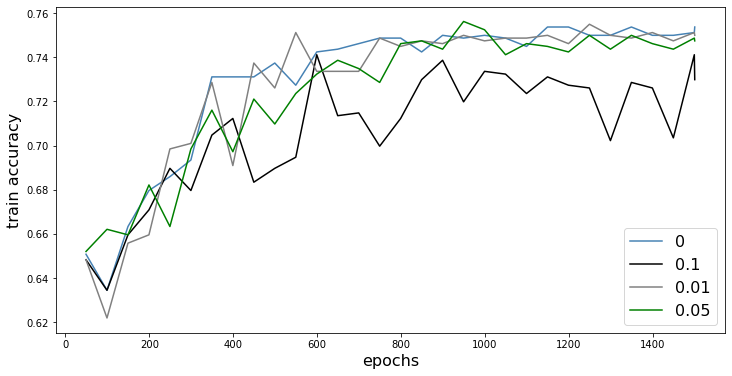

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#---Important!---
#I'm starting my range from 49, because without it, from range 50 to 1000 to 50 was giving me an error
#about dimensionality. So I'm starting 1 below 50. store_epoch has value 50, go to 1000, and use a step of 50 from my understanding
epochs_array = [i for i in range(store_epoch-1, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, train_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, train_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, train_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

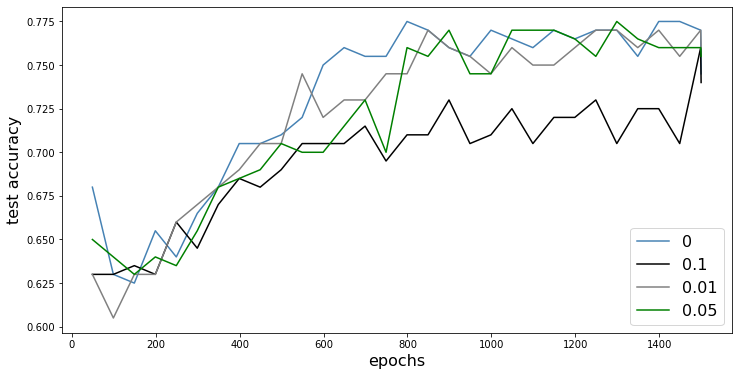

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#---Important!---
#I'm starting my range from 49, because without it, from range 50 to 1000 to 50 was giving me an error
#about dimensionality. So I'm starting 1 below 50. store_epoch has value 50, go to 1000, and use a step of 50 from my understanding
epochs_array = [i for i in range(store_epoch-1, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, test_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, test_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, test_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

**Part 2 F (continued)** What is the effect of regularization term with respect to accuracy? 

**(SOLUTION):**

Regularization is used so that our Model does not run the risk of overfitting! It will increase the accurary of your testing, but decrease the accuracy of your training, at least in the ideal sense that is what it will do, but it could be that the testing accuracy may be impacted by underfitting. See how in the model at $0.1$ we have a test accuracy worse than the other regularization values, so this proves that sometimes that can occur. $\checkmark$

### Part 3 [5 points] 

Time based Learning Rate is dynamic learning rate given the following equation:

$\textrm{LearningRate} = \eta\, / \,(1 + \textrm{decay} \cdot \textrm{current epoch})$

Train SGD with the dynamic learning rate defined above and follow these instructions:
* Use initial learning rate $\eta = 0.1$.
* Use $\textrm{decay} = 0.001$.
* Update learning rate `lr.eta` every epoch.
* Plot train accuracy and learning rate together for each epoch.

The above can be accomplished by changing one line in `train()` from Part 2a. 

In [29]:
eta  = 1e-1
epochs = 200
store_epoch = 1

# Lists required for plotting
train_accuracy_array = None
learning_rates = None

# YOUR CODE HERE
# raise NotImplementedError()
# ------ TAKING MY CODE FROM TRAINING FUNCTION ---------
dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)
train_accuracy_array = []
learning_rates = []
for epoch in range(epochs):
    #UPDATE: We just need to look at our test values now.
    #Now, let's get our X and Y Training Data from shuffle function on training x and training y
    XTrain, YTrain = dataset_handler.shuffle(dataset_handler.train_x, dataset_handler.train_y)
    #We need to zip our training data and update using sgd_update with values from X and Y Training
    #UPDATE: Now we update our lr.eta here with the correct decay and vars.
    denomVar = 1 + (0.001 * epoch)
    lr.eta = lr.eta / denomVar
    #UPDATE: Now to learning rate we append our eta value
    learning_rates.append(lr.eta)
    for i, j in zip(XTrain, YTrain):
        #Use sgd update to complete the task
        lr.sgd_update(i, j)
    #We do the same thing for our training data now, we run progress and get back two return values.
    lp_train, trainAcc = lr.progress(XTrain, YTrain)
    #Similarly, we append the array of training accuracy to the array given above.
    train_accuracy_array.append(trainAcc)

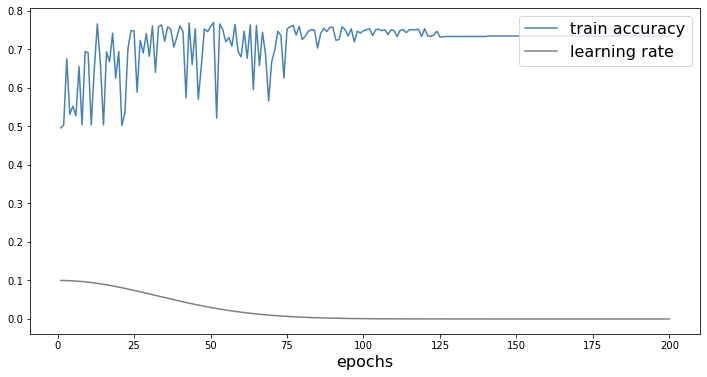

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(1,epochs)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_accuracy_array, color="steelblue", label=str('train accuracy'))
ax.plot(epochs_array, learning_rates,color="grey", label=str('learning rate'))
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("", fontsize=16)
plt.show()

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://docs.google.com/forms/d/e/1FAIpQLSfa22OUdAI2LDrK8LA2ldPBEW08-2wM8oVDkeNr528UCijdLA/viewform?usp=pp_url) to solicit your feedback for how to improve the course.

Suvery Completed! $\checkmark$